In [ ]:
# Install required libraries
!pip install ta

# Import necessary libraries
import pandas as pd
import numpy as np
from ta.momentum import RSIIndicator, WilliamsRIndicator, StochasticOscillator
from ta.volatility import AverageTrueRange
from ta.trend import PSARIndicator, CCIIndicator, ADXIndicator, WMAIndicator
from ta.volume import MFIIndicator

# ----------------------------
# Stage 1: Input and Target Creation
# ----------------------------

# 1. Read the CSV file
df = pd.read_csv("/content/data.csv/TSLA.csv")

# 2. Convert the date column to datetime
#df['Date'] = pd.to_datetime(df['Date'], format="%m/%d/%Y")

# 2. Convert the date column to datetime
df['Date'] = pd.to_datetime(df['Date'], format="%d-%m-%Y") # Changed the format string

# 3. Rename columns (if necessary)
df.columns = ['Date', 'Open', 'High', 'Low', 'Close', 'Volume']

# ----------------------------
# Calculation of Input Series (r1 to r18)
# ----------------------------

# r1: log(Close[i] / Close[i-1])
df['r1'] = np.log(df['Close'] / df['Close'].shift(1))

# r2: log(Close[i-1] / Close[i-2])
df['r2'] = np.log(df['Close'].shift(1) / df['Close'].shift(2))

# r3: log(Close[i-2] / Close[i-3])
df['r3'] = np.log(df['Close'].shift(2) / df['Close'].shift(3))

# r4: log(Close[i-3] / Close[i-4])
df['r4'] = np.log(df['Close'].shift(3) / df['Close'].shift(4))

# r5: log(High[i] / Open[i])
df['r5'] = np.log(df['High'] / df['Open'])

# r6: log(High[i] / Open[i-1])
df['r6'] = np.log(df['High'] / df['Open'].shift(1))

# r7: log(High[i] / Open[i-2])
df['r7'] = np.log(df['High'] / df['Open'].shift(2))

# r8: log(High[i] / Open[i-3])
df['r8'] = np.log(df['High'] / df['Open'].shift(3))

# r9: log(High[i] / Open[i-4])
df['r9'] = np.log(df['High'] / df['Open'].shift(4))

# r10: log(High[i-1] / Open[i-1])
df['r10'] = np.log(df['High'].shift(1) / df['Open'].shift(1))

# r11: log(High[i-2] / Open[i-2])
df['r11'] = np.log(df['High'].shift(2) / df['Open'].shift(2))

# r12: log(High[i-3] / Open[i-3])
df['r12'] = np.log(df['High'].shift(3) / df['Open'].shift(3))

# r13: log(High[i-4] / Open[i-4])
df['r13'] = np.log(df['High'].shift(4) / df['Open'].shift(4))

# r14: log(Low[i] / Open[i])
df['r14'] = np.log(df['Low'] / df['Open'])

# r15: log(Low[i-1] / Open[i-1])
df['r15'] = np.log(df['Low'].shift(1) / df['Open'].shift(1))

# r16: log(Low[i-2] / Open[i-2])
df['r16'] = np.log(df['Low'].shift(2) / df['Open'].shift(2))

# r17: log(Low[i-3] / Open[i-3])
df['r17'] = np.log(df['Low'].shift(3) / df['Open'].shift(3))

# r18: log(Low[i-4] / Open[i-4])
df['r18'] = np.log(df['Low'].shift(4) / df['Open'].shift(4))

# ----------------------------
# Calculation of Technical Indicators
# ----------------------------

# 1. RSI (Relative Strength Index)
rsi_indicator = RSIIndicator(close=df['Close'], window=14)
df['RSI'] = rsi_indicator.rsi()

# 2. Momentum (10-day lag difference)
df['Momentum'] = df['Close'] - df['Close'].shift(10)

# 3. ATR (Average True Range)
atr_indicator = AverageTrueRange(high=df['High'], low=df['Low'], close=df['Close'], window=14)
df['ATR'] = atr_indicator.average_true_range()

# 4. Parabolic SAR
psar_indicator = PSARIndicator(high=df['High'], low=df['Low'], close=df['Close'], step=0.02, max_step=0.2)
df['SAR'] = psar_indicator.psar()

# 5. MFI (Money Flow Index)
mfi_indicator = MFIIndicator(high=df['High'], low=df['Low'], close=df['Close'], volume=df['Volume'], window=14)
df['MFI'] = mfi_indicator.money_flow_index()

# 6. CCI (Commodity Channel Index)
cci_indicator = CCIIndicator(high=df['High'], low=df['Low'], close=df['Close'], window=20)
df['CCI'] = cci_indicator.cci()

# 7. SMA (Simple Moving Average, 20-day)
df['SMA'] = df['Close'].rolling(window=20).mean()

# 8. WMA (Weighted Moving Average, 20-day)
wma_indicator = WMAIndicator(close=df['Close'], window=20)
df['WMA'] = wma_indicator.wma()

# 9. HMA (Hull Moving Average, 20-day)
def hull_moving_average(series, window):
    half_length = int(window / 2)
    sqrt_length = int(np.sqrt(window))  # Use numpy for clarity
    wma_half = WMAIndicator(close=series, window=half_length).wma()
    wma_full = WMAIndicator(close=series, window=window).wma()
    return WMAIndicator(close=2 * wma_half - wma_full, window=sqrt_length).wma()

df['HMA'] = hull_moving_average(df['Close'], window=20)

# 10. ADX (Average Directional Index)
adx_indicator = ADXIndicator(high=df['High'], low=df['Low'], close=df['Close'], window=14)
df['ADX'] = adx_indicator.adx()

# 11. Williams %R
wpr_indicator = WilliamsRIndicator(high=df['High'], low=df['Low'], close=df['Close'], lbp=14)
df['WPR'] = wpr_indicator.williams_r()

# 12. Stochastic Oscillator
stoch_osc = StochasticOscillator(high=df['High'], low=df['Low'], close=df['Close'], window=14, smooth_window=3)
df['stoch_k'] = stoch_osc.stoch()
df['stoch_d'] = stoch_osc.stoch_signal()

# ----------------------------
# Drop NaN rows (from lagged calculations and indicators)
# ----------------------------
df.dropna(inplace=True)

# ----------------------------
# Display the first 20 rows of the resulting dataframe
# ----------------------------
df.to_csv('Teslaoutput.csv', index=False)  # Save to 'output.csv', exclude index column
print("DataFrame saved to output.csv")

DataFrame saved to output.csv



Delta t-test (Welch) Results:
  t-statistic  = -0.000363
  p-value      = 0.999712
  df           = 36.000   (Welch's approximation)
  Mean Group1  = 0.074842
  Mean Group2  = 0.074632
  Difference   = 0.000211   (Group1 - Group2)
  95% CI       = [-1.175851, 1.176272]


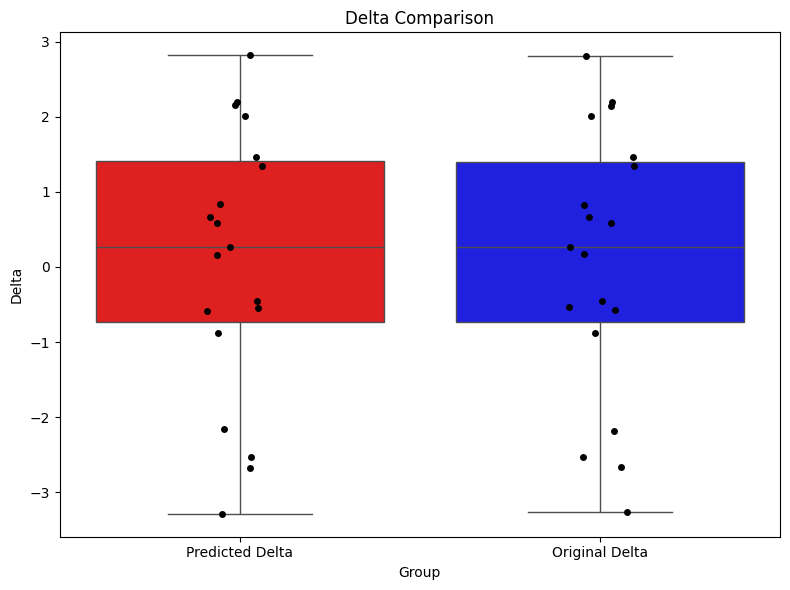


Returned Statistics for Delta Record:
  t_statistic: -0.000363
  p_value: 0.999712
  degrees_of_freedom: 35.999778
  mean_group1: 0.074842
  mean_group2: 0.074632
  mean_difference: 0.000211
  ci_lower: -1.175851
  ci_upper: 1.176272


In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
from scipy.stats import ttest_ind, t

def welch_df(x, y):
    """
    Compute Welch's approximate degrees of freedom.

    Parameters:
      x (array-like): Data from group 1.
      y (array-like): Data from group 2.

    Returns:
      float: Welch's degrees of freedom approximation.
    """
    s1 = np.var(x, ddof=1)
    s2 = np.var(y, ddof=1)
    n1 = len(x)
    n2 = len(y)

    numerator = (s1/n1 + s2/n2) ** 2
    denominator = ((s1/n1) ** 2 / (n1 - 1)) + ((s2/n2) ** 2 / (n2 - 1))

    return numerator / denominator

def compare_derived_index(file_path, group_order, palette_colors, index_label, reverse_t_sign=False):
    """
    Reads an Excel file containing 'Group' and 'Value' columns,
    creates a boxplot with jittered points, performs an independent t-test (Welch),
    prints the results, annotates the plot, and returns the computed statistics.

    Parameters:
      file_path (str): Full path to the Excel file.
      group_order (list): List with two group names in the desired order.
      palette_colors (list): List of colors for the groups.
      index_label (str): Label of the index (used in title and y-axis).
      reverse_t_sign (bool): Whether to reverse the sign of the t-value.

    Returns:
      dict: Dictionary containing the t-statistic, p-value, degrees of freedom,
            group means, mean difference, and the 95% confidence interval.
    """
    # Load the Excel data
    data = pd.read_excel(file_path, sheet_name=0)

    # Ensure the required columns exist
    if "Group" not in data.columns or "Value" not in data.columns:
        raise ValueError("Excel file must contain 'Group' and 'Value' columns.")

    # Create the boxplot by assigning hue to "Group" with dodge=False
    plt.figure(figsize=(8, 6))
    ax = sns.boxplot(x="Group", y="Value", data=data, order=group_order, hue="Group",
                     palette=dict(zip(group_order, palette_colors)), dodge=False)
    # Remove the legend that is automatically created
    if ax.get_legend() is not None:
        ax.get_legend().remove()

    # Add jittered points with a stripplot
    sns.stripplot(x="Group", y="Value", data=data, order=group_order, color='black', jitter=True)

    plt.title(f"{index_label} Comparison")
    plt.xlabel("Group")
    plt.ylabel(index_label)

    # Extract data for both groups (drop NaN values)
    group1 = data[data["Group"] == group_order[0]]["Value"].dropna().to_numpy()
    group2 = data[data["Group"] == group_order[1]]["Value"].dropna().to_numpy()

    # Perform Welch's t-test (without assuming equal variances)
    t_stat, p_val = ttest_ind(group1, group2, equal_var=False)

    # Optionally reverse the sign of the t-statistic
    if reverse_t_sign:
        t_stat = -t_stat

    # Compute Welch's degrees of freedom
    df_approx = welch_df(group1, group2)

    # Compute the mean difference (Group1 - Group2)
    mean_diff = np.mean(group1) - np.mean(group2)

    # Compute the standard error of the mean difference
    var1 = np.var(group1, ddof=1)
    var2 = np.var(group2, ddof=1)
    n1 = len(group1)
    n2 = len(group2)
    se = np.sqrt(var1/n1 + var2/n2)

    # Compute the 95% confidence interval for the difference
    alpha = 0.05
    t_crit = t.ppf(1 - alpha/2, df_approx)
    ci_lower = mean_diff - t_crit * se
    ci_upper = mean_diff + t_crit * se

    # Print the computed statistics
    print(f"\n{index_label} t-test (Welch) Results:")
    print(f"  t-statistic  = {t_stat:.6f}")
    print(f"  p-value      = {p_val:.6f}")
    print(f"  df           = {df_approx:.3f}   (Welch's approximation)")
    print(f"  Mean Group1  = {np.mean(group1):.6f}")
    print(f"  Mean Group2  = {np.mean(group2):.6f}")
    print(f"  Difference   = {mean_diff:.6f}   (Group1 - Group2)")
    print(f"  95% CI       = [{ci_lower:.6f}, {ci_upper:.6f}]")

    # Annotate the plot with the results
    ymax = data["Value"].max()
    annotation_text = (
        f"t = {t_stat:.2f}\n"
        f"p = {p_val:.3f}\n"
        f"df ≈ {df_approx:.2f}\n"
        f"Diff = {mean_diff:.2f}\n"
        f"95% CI:\n[{ci_lower:.2f}, {ci_upper:.2f}]"
    )
   # plt.text(0.5, ymax * 0.95, annotation_text,
             #ha="center", va="top", fontsize=11, color="red")

    plt.tight_layout()
    plt.show()

    # Return the computed statistics as a dictionary
    return {
        "t_statistic": t_stat,
        "p_value": p_val,
        "degrees_of_freedom": df_approx,
        "mean_group1": np.mean(group1),
        "mean_group2": np.mean(group2),
        "mean_difference": mean_diff,
        "ci_lower": ci_lower,
        "ci_upper": ci_upper
    }

# ------------------------
# Example usage for Delta Record
# ------------------------
if __name__ == "__main__":
    # Update the file path for your Delta record file
    delta_file_path = "/content/Delta.xlsx"

    # Define the group order and palette for your Delta data.
    # For example, if the groups are "Predicted Delta" and "Original Delta":
    group_order_delta = ["Predicted Delta", "Original Delta"]
    palette_delta = ["red", "blue"]

    # Set the index label to "Delta" and decide whether to reverse the t-value sign.
    stats_delta = compare_derived_index(
        file_path=delta_file_path,
        group_order=group_order_delta,
        palette_colors=palette_delta,
        index_label="Delta",
        reverse_t_sign=True  # Change this flag as needed
    )

    print("\nReturned Statistics for Delta Record:")
    for key, value in stats_delta.items():
        if isinstance(value, float):
            print(f"  {key}: {value:.6f}")
        else:
            print(f"  {key}: {value}")



PKH t-test (Welch) Results:
  t-statistic  = -0.165153
  p-value      = 0.872148
  df           = 9.899   (Welch's approximation)
  Mean Group1  = 64.415000
  Mean Group2  = 64.266667
  Difference   = 0.148333   (Group1 - Group2)
  95% CI       = [-1.855653, 2.152320]


<ipython-input-8-4b0d5c55c6da>:22: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x="Group", y="Value", data=data, order=group_order, palette=palette_colors)


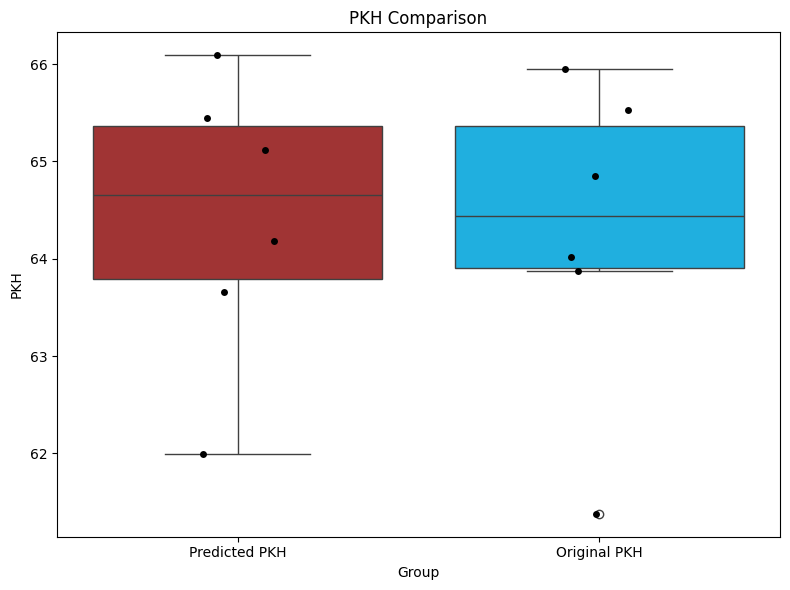

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
from scipy.stats import ttest_ind, t

def welch_df(x, y):
    s1 = np.var(x, ddof=1)
    s2 = np.var(y, ddof=1)
    n1 = len(x)
    n2 = len(y)
    numerator = (s1/n1 + s2/n2) ** 2
    denominator = ((s1/n1) ** 2 / (n1 - 1)) + ((s2/n2) ** 2 / (n2 - 1))
    return numerator / denominator

def compare_derived_index(file_path, group_order, palette_colors, index_label):
    data = pd.read_excel(file_path, sheet_name=0)
    if "Group" not in data.columns or "Value" not in data.columns:
        raise ValueError("Excel file must contain 'Group' and 'Value' columns.")

    plt.figure(figsize=(8, 6))
    sns.boxplot(x="Group", y="Value", data=data, order=group_order, palette=palette_colors)
    sns.stripplot(x="Group", y="Value", data=data, order=group_order, color='black', jitter=True)
    plt.title(f"{index_label} Comparison")
    plt.xlabel("Group")
    plt.ylabel(index_label)

    # Extract data for both groups
    group1 = data[data["Group"] == group_order[0]]["Value"].dropna().to_numpy()
    group2 = data[data["Group"] == group_order[1]]["Value"].dropna().to_numpy()

    # Perform Welch's t-test
    t_stat, p_val = ttest_ind(group1, group2, equal_var=False)

    # Reverse the sign to match table reporting (if required)
    t_stat = -t_stat

    df_approx = welch_df(group1, group2)
    mean_diff = np.mean(group1) - np.mean(group2)
    var1 = np.var(group1, ddof=1)
    var2 = np.var(group2, ddof=1)
    n1 = len(group1)
    n2 = len(group2)
    se = np.sqrt(var1/n1 + var2/n2)

    alpha = 0.05
    t_crit = t.ppf(1 - alpha/2, df_approx)
    ci_lower = mean_diff - t_crit * se
    ci_upper = mean_diff + t_crit * se

    print(f"\n{index_label} t-test (Welch) Results:")
    print(f"  t-statistic  = {t_stat:.6f}")
    print(f"  p-value      = {p_val:.6f}")
    print(f"  df           = {df_approx:.3f}   (Welch's approximation)")
    print(f"  Mean Group1  = {np.mean(group1):.6f}")
    print(f"  Mean Group2  = {np.mean(group2):.6f}")
    print(f"  Difference   = {mean_diff:.6f}   (Group1 - Group2)")
    print(f"  95% CI       = [{ci_lower:.6f}, {ci_upper:.6f}]")

    ymax = data["Value"].max()
    annotation_text = (
        f"t = {t_stat:.2f}\n"
        f"p = {p_val:.3f}\n"
        f"df ≈ {df_approx:.2f}\n"
        f"Diff = {mean_diff:.2f}\n"
        f"95% CI:\n[{ci_lower:.2f}, {ci_upper:.2f}]"
    )
   #plt.text(0.5, ymax * 0.95, annotation_text,
             #ha="center", va="top", fontsize=11, color="red")
    plt.tight_layout()
    plt.show()

if __name__ == "__main__":
    pkh_file_path = "/content/PKH.xlsx"  # Update with your actual file path
    group_order_pkh = ["Predicted PKH", "Original PKH"]
    palette_pkh = ["firebrick", "deepskyblue"]

    compare_derived_index(
        file_path=pkh_file_path,
        group_order=group_order_pkh,
        palette_colors=palette_pkh,
        index_label="PKH"
    )


<ipython-input-9-1481c70f654b>:54: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x="Group", y="Value", data=data, order=group_order, palette=palette_colors)



Return t-test (Welch) Results:
  t-statistic  = -0.008624
  p-value      = 0.993167
  df           = 36.000   (Welch's approximation)
  Mean Group1  = 0.001526
  Mean Group2  = 0.001456
  Difference   = 0.000071   (Group1 - Group2)
  95% CI       = [-0.016516, 0.016657]


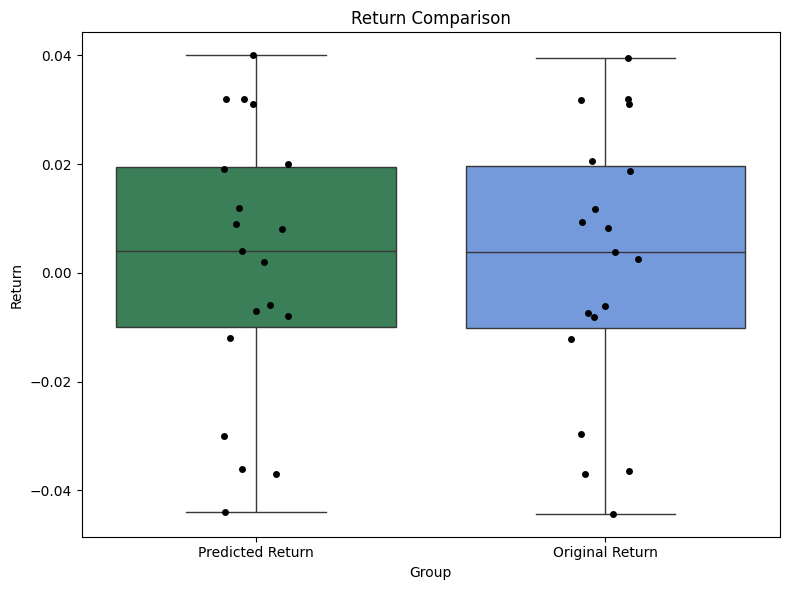


Returned Statistics for Return Record:
  t_statistic: -0.008624
  p_value: 0.993167
  degrees_of_freedom: 35.999980
  mean_group1: 0.001526
  mean_group2: 0.001456
  mean_difference: 0.000071
  ci_lower: -0.016516
  ci_upper: 0.016657


In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
from scipy.stats import ttest_ind, t

def welch_df(x, y):
    """
    Compute Welch's approximate degrees of freedom.

    Parameters:
      x (array-like): Data from group 1.
      y (array-like): Data from group 2.

    Returns:
      float: Welch's degrees of freedom approximation.
    """
    s1 = np.var(x, ddof=1)
    s2 = np.var(y, ddof=1)
    n1 = len(x)
    n2 = len(y)

    numerator = (s1/n1 + s2/n2) ** 2
    denominator = ((s1/n1) ** 2 / (n1 - 1)) + ((s2/n2) ** 2 / (n2 - 1))

    return numerator / denominator

def compare_derived_index(file_path, group_order, palette_colors, index_label, reverse_t_sign=False):
    """
    Reads an Excel file containing 'Group' and 'Value' columns,
    creates a boxplot with jittered points, performs an independent t-test (Welch),
    prints the results, annotates the plot, and returns the computed statistics.

    Parameters:
      file_path (str): Full path to the Excel file.
      group_order (list): List with two group names in the desired order.
      palette_colors (list): Colors for the boxplot groups.
      index_label (str): Label of the index (used in title and y-axis).
      reverse_t_sign (bool): Whether to reverse the sign of the t-value.

    Returns:
      dict: Dictionary containing the t-statistic, p-value, degrees of freedom,
            group means, mean difference, and the 95% confidence interval.
    """
    # Load Excel data
    data = pd.read_excel(file_path, sheet_name=0)

    # Check that required columns exist
    if "Group" not in data.columns or "Value" not in data.columns:
        raise ValueError("Excel file must contain 'Group' and 'Value' columns.")

    # Create boxplot with jittered points
    plt.figure(figsize=(8, 6))
    sns.boxplot(x="Group", y="Value", data=data, order=group_order, palette=palette_colors)
    sns.stripplot(x="Group", y="Value", data=data, order=group_order, color='black', jitter=True)

    plt.title(f"{index_label} Comparison")
    plt.xlabel("Group")
    plt.ylabel(index_label)

    # Extract data for both groups (drop NaN values)
    group1 = data[data["Group"] == group_order[0]]["Value"].dropna().to_numpy()
    group2 = data[data["Group"] == group_order[1]]["Value"].dropna().to_numpy()

    # Perform Welch's t-test
    t_stat, p_val = ttest_ind(group1, group2, equal_var=False)

    # Optionally reverse the t_stat sign if needed
    if reverse_t_sign:
        t_stat = -t_stat

    # Compute Welch's degrees of freedom
    df_approx = welch_df(group1, group2)

    # Compute the mean difference (group1 minus group2)
    mean_diff = np.mean(group1) - np.mean(group2)

    # Compute standard error of the difference
    var1 = np.var(group1, ddof=1)
    var2 = np.var(group2, ddof=1)
    n1 = len(group1)
    n2 = len(group2)
    se = np.sqrt(var1/n1 + var2/n2)

    # Compute 95% confidence interval for the mean difference
    alpha = 0.05
    t_crit = t.ppf(1 - alpha/2, df_approx)
    ci_lower = mean_diff - t_crit * se
    ci_upper = mean_diff + t_crit * se

    # Print the computed statistics
    print(f"\n{index_label} t-test (Welch) Results:")
    print(f"  t-statistic  = {t_stat:.6f}")
    print(f"  p-value      = {p_val:.6f}")
    print(f"  df           = {df_approx:.3f}   (Welch's approximation)")
    print(f"  Mean Group1  = {np.mean(group1):.6f}")
    print(f"  Mean Group2  = {np.mean(group2):.6f}")
    print(f"  Difference   = {mean_diff:.6f}   (Group1 - Group2)")
    print(f"  95% CI       = [{ci_lower:.6f}, {ci_upper:.6f}]")

    # Annotate the plot with the t-test results
    ymax = data["Value"].max()
    annotation_text = (
        f"t = {t_stat:.2f}\n"
        f"p = {p_val:.3f}\n"
        f"df ≈ {df_approx:.2f}\n"
        f"Diff = {mean_diff:.2f}\n"
        f"95% CI:\n[{ci_lower:.2f}, {ci_upper:.2f}]"
    )

    plt.tight_layout()
    plt.show()

    # Return the computed statistics as a dictionary
    return {
        "t_statistic": t_stat,
        "p_value": p_val,
        "degrees_of_freedom": df_approx,
        "mean_group1": np.mean(group1),
        "mean_group2": np.mean(group2),
        "mean_difference": mean_diff,
        "ci_lower": ci_lower,
        "ci_upper": ci_upper
    }

# ------------------------
# Example usage for Return Record
# ------------------------
if __name__ == "__main__":
    # Update the file path if necessary for your Return record
    return_file_path = "/content/Return.xlsx"

    # Define the group order and palette colors as per your Return record data.
    # Here is an example. Adjust the names if they differ in your dataset.
    group_order_return = ["Predicted Return", "Original Return"]
    palette_return = ["seagreen", "cornflowerblue"]

    # Choose an index label: here, we use "Return"
    stats_return = compare_derived_index(
        file_path=return_file_path,
        group_order=group_order_return,
        palette_colors=palette_return,
        index_label="Return",
        reverse_t_sign=True  # Set to True if you need to reverse the t-value sign.
    )

    print("\nReturned Statistics for Return Record:")
    for key, value in stats_return.items():
        if isinstance(value, float):
            print(f"  {key}: {value:.6f}")
        else:
            print(f"  {key}: {value}")



TRUD t-test (Welch) Results:
  t-statistic  = -0.016011
  p-value      = 0.987541
  df           = 9.989   (Welch's approximation)
  Mean Group1  = 32.681667
  Mean Group2  = 32.665000
  Difference   = 0.016667   (Group1 - Group2)
  95% CI       = [-2.303065, 2.336398]


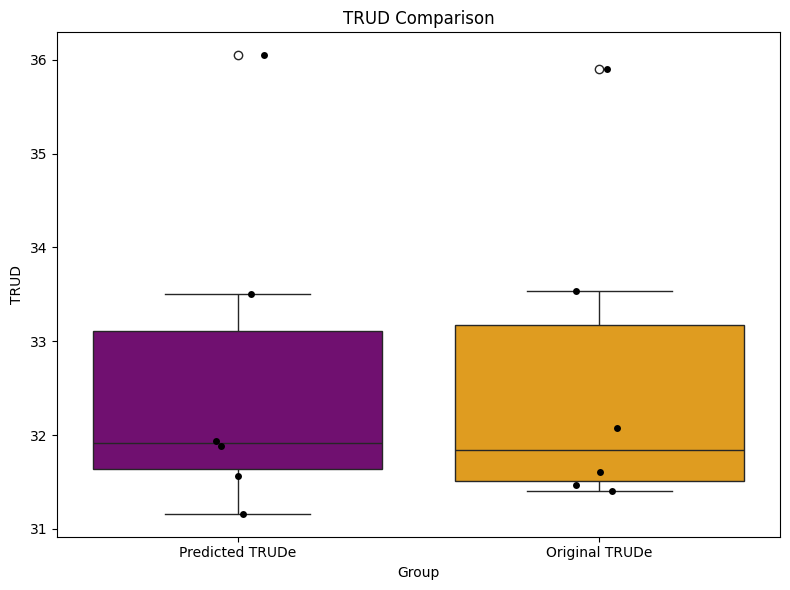


Returned Statistics for TRUD Record:
  t_statistic: -0.016011
  p_value: 0.987541
  degrees_of_freedom: 9.989468
  mean_group1: 32.681667
  mean_group2: 32.665000
  mean_difference: 0.016667
  ci_lower: -2.303065
  ci_upper: 2.336398


In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
from scipy.stats import ttest_ind, t

def welch_df(x, y):
    """
    Compute Welch's approximate degrees of freedom.

    Parameters:
      x (array-like): Data from group 1.
      y (array-like): Data from group 2.

    Returns:
      float: Welch's degrees of freedom approximation.
    """
    s1 = np.var(x, ddof=1)
    s2 = np.var(y, ddof=1)
    n1 = len(x)
    n2 = len(y)

    numerator = (s1/n1 + s2/n2) ** 2
    denominator = ((s1/n1) ** 2 / (n1 - 1)) + ((s2/n2) ** 2 / (n2 - 1))

    return numerator / denominator

def compare_derived_index(file_path, group_order, palette_colors, index_label, reverse_t_sign=False):
    """
    Reads an Excel file containing 'Group' and 'Value' columns,
    creates a boxplot with jittered points, performs an independent t-test (Welch),
    prints the results, annotates the plot, and returns the computed statistics.

    Parameters:
      file_path (str): Full path to the Excel file.
      group_order (list): List with two group names in the desired order.
      palette_colors (list): List of colors for the groups.
      index_label (str): Label of the index (used in title and y-axis).
      reverse_t_sign (bool): Whether to reverse the sign of the t-value.

    Returns:
      dict: Dictionary containing the t-statistic, p-value, degrees of freedom,
            group means, mean difference, and the 95% confidence interval.
    """
    # Load the Excel data
    data = pd.read_excel(file_path, sheet_name=0)

    # Ensure the required columns exist
    if "Group" not in data.columns or "Value" not in data.columns:
        raise ValueError("Excel file must contain 'Group' and 'Value' columns.")

    # Create a palette dictionary mapping group names to colors
    palette_dict = dict(zip(group_order, palette_colors))

    # Create the boxplot: assign 'hue' to "Group", use dodge=False and then remove the legend
    plt.figure(figsize=(8, 6))
    ax = sns.boxplot(x="Group", y="Value", data=data, order=group_order, hue="Group",
                     palette=palette_dict, dodge=False)
    # Remove the legend if it exists
    if ax.get_legend() is not None:
        ax.get_legend().remove()

    # Add jittered points with a stripplot
    sns.stripplot(x="Group", y="Value", data=data, order=group_order, color='black', jitter=True)

    plt.title(f"{index_label} Comparison")
    plt.xlabel("Group")
    plt.ylabel(index_label)

    # Extract data for both groups (dropping missing values)
    group1 = data[data["Group"] == group_order[0]]["Value"].dropna().to_numpy()
    group2 = data[data["Group"] == group_order[1]]["Value"].dropna().to_numpy()

    # Perform Welch's t-test (no equal variances assumption)
    t_stat, p_val = ttest_ind(group1, group2, equal_var=False)

    # Optionally reverse the t-statistic if needed
    if reverse_t_sign:
        t_stat = -t_stat

    # Compute Welch's degrees of freedom
    df_approx = welch_df(group1, group2)

    # Compute the mean difference (Group1 - Group2)
    mean_diff = np.mean(group1) - np.mean(group2)

    # Compute the standard error of the mean difference
    var1 = np.var(group1, ddof=1)
    var2 = np.var(group2, ddof=1)
    n1 = len(group1)
    n2 = len(group2)
    se = np.sqrt(var1/n1 + var2/n2)

    # Compute the 95% confidence interval
    alpha = 0.05
    t_crit = t.ppf(1 - alpha/2, df_approx)
    ci_lower = mean_diff - t_crit * se
    ci_upper = mean_diff + t_crit * se

    # Print the computed statistics
    print(f"\n{index_label} t-test (Welch) Results:")
    print(f"  t-statistic  = {t_stat:.6f}")
    print(f"  p-value      = {p_val:.6f}")
    print(f"  df           = {df_approx:.3f}   (Welch's approximation)")
    print(f"  Mean Group1  = {np.mean(group1):.6f}")
    print(f"  Mean Group2  = {np.mean(group2):.6f}")
    print(f"  Difference   = {mean_diff:.6f}   (Group1 - Group2)")
    print(f"  95% CI       = [{ci_lower:.6f}, {ci_upper:.6f}]")

    # Annotate the plot with the t-test results
    ymax = data["Value"].max()
    annotation_text = (
        f"t = {t_stat:.2f}\n"
        f"p = {p_val:.3f}\n"
        f"df ≈ {df_approx:.2f}\n"
        f"Diff = {mean_diff:.2f}\n"
        f"95% CI:\n[{ci_lower:.2f}, {ci_upper:.2f}]"
    )


    plt.tight_layout()
    plt.show()

    # Return the computed statistics as a dictionary
    return {
        "t_statistic": t_stat,
        "p_value": p_val,
        "degrees_of_freedom": df_approx,
        "mean_group1": np.mean(group1),
        "mean_group2": np.mean(group2),
        "mean_difference": mean_diff,
        "ci_lower": ci_lower,
        "ci_upper": ci_upper
    }

# ------------------------
# Example usage for TRUD Record
# ------------------------
if __name__ == "__main__":
    # Update the file path for your TRUD record file
    trud_file_path = "/content/TRUD.xlsx"

    # Define the group order and palette for your TRUD data.
    # For example, if your groups are "Predicted TRUD" and "Original TRUD":
    group_order_trud = ["Predicted TRUDe", "Original TRUDe"] # changed keys to match user error message
    palette_trud = ["purple", "orange"]

    # Set the index label to "TRUD" and specify whether to reverse the t-value sign if needed.
    stats_trud = compare_derived_index(
        file_path=trud_file_path,
        group_order=group_order_trud,
        palette_colors=palette_trud,
        index_label="TRUD",
        reverse_t_sign=True  # Change to False if reversing is not needed.
    )

    print("\nReturned Statistics for TRUD Record:")
    for key, value in stats_trud.items():
        if isinstance(value, float):
            print(f"  {key}: {value:.6f}")
        else:
            print(f"  {key}: {value}")

<ipython-input-3-98a56fea25fe>:21: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  ax = sns.boxplot(data=df, x=group_col, y=value_col, palette="Blues_d")


p-value annotation legend:
      ns: 5.00e-02 < p <= 1.00e+00
       *: 1.00e-02 < p <= 5.00e-02
      **: 1.00e-03 < p <= 1.00e-02
     ***: 1.00e-04 < p <= 1.00e-03
    ****: p <= 1.00e-04

CP1 vs. CP2: Mann-Whitney-Wilcoxon test two-sided, P_val:8.955e-01 U_stat=1.755e+02
CP2 vs. CP3: Mann-Whitney-Wilcoxon test two-sided, P_val:8.609e-01 U_stat=1.740e+02
CP1 vs. CP3: Mann-Whitney-Wilcoxon test two-sided, P_val:8.153e-01 U_stat=1.720e+02


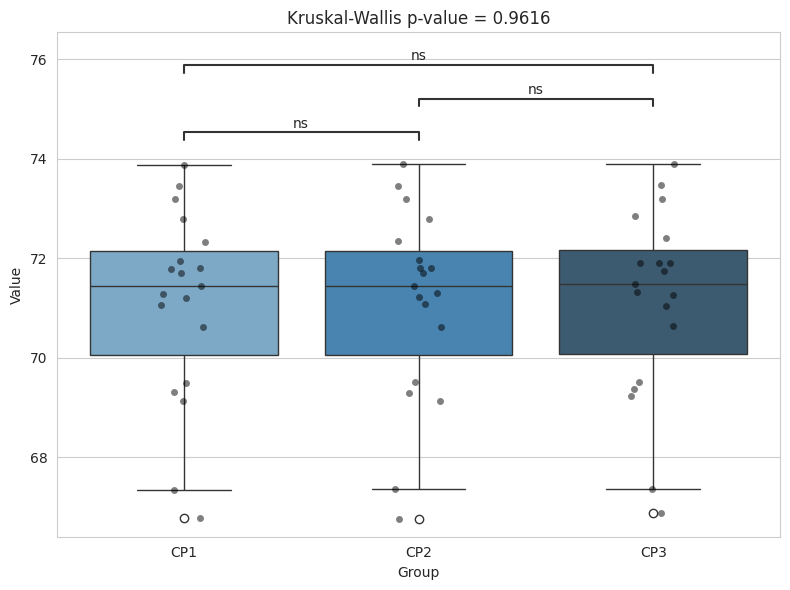

In [ ]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from scipy.stats import kruskal
from statannotations.Annotator import Annotator

# Load your Excel file
file_path = "/content/File No.11.xlsx"
df = pd.read_excel(file_path)

# Drop the 'row' column (not needed)
df = df.drop(columns=['row'])

# Define group and value columns
group_col = 'Group'
value_col = 'Value'

# Initialize boxplot
plt.figure(figsize=(8, 6))
sns.set_style("whitegrid")
ax = sns.boxplot(data=df, x=group_col, y=value_col, palette="Blues_d")
sns.stripplot(data=df, x=group_col, y=value_col, color='black', alpha=0.5, jitter=True)

# Pairwise comparisons
comparisons = [("CP1", "CP2"), ("CP1", "CP3"), ("CP2", "CP3")]

# Annotate statistical tests
annotator = Annotator(ax, comparisons, data=df, x=group_col, y=value_col)
annotator.configure(test='Mann-Whitney', text_format='star', loc='inside')
annotator.apply_and_annotate()

# Kruskal-Wallis test across all groups
groups = [group['Value'].values for name, group in df.groupby('Group')]
stat, p = kruskal(*groups)
plt.title(f"Kruskal-Wallis p-value = {p:.4f}")

plt.tight_layout()
plt.show()


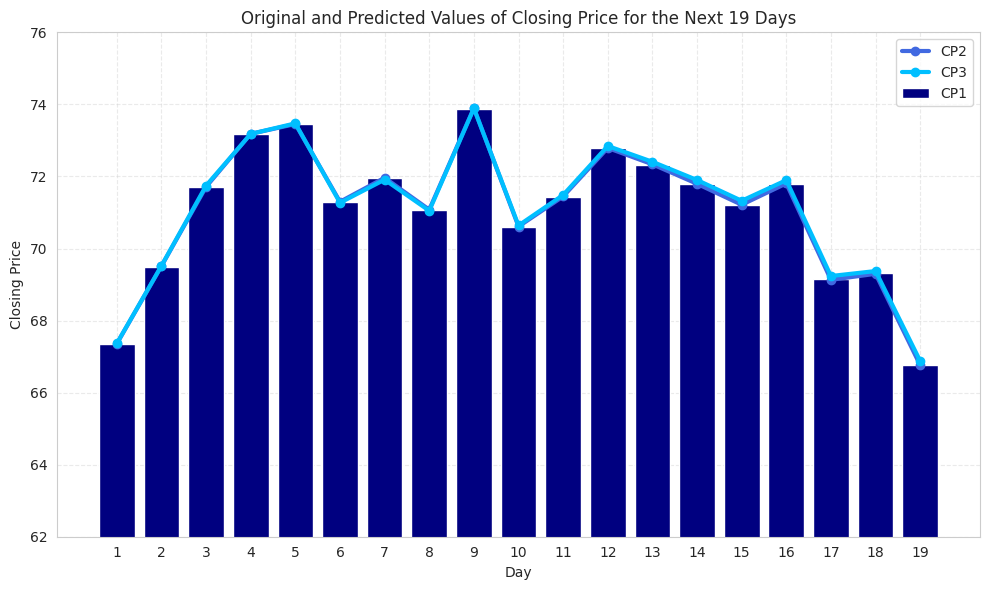

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt

# Load the Excel file
file_path = "/content/Figure_15_CP_Comparison.xlsx"
df = pd.read_excel(file_path)

# Extract columns
days = df['Day']
cp1 = df['Original Closing Price (CP1)']
cp2 = df['Calculated Closing Price using Predicted Delta (CP2)']
cp3 = df['Calculated Closing Price using Predicted Return (CP3)']

# Plotting
plt.figure(figsize=(10, 6))
plt.bar(days, cp1, color='navy', label='CP1')  # CP1 as bars
plt.plot(days, cp2, marker='o', linewidth=3, color='royalblue', label='CP2')  # CP2 as line
plt.plot(days, cp3, marker='o', linewidth=3, color='deepskyblue', label='CP3')  # CP3 as line

# Styling
plt.xticks(days)
plt.xlabel("Day")
plt.ylabel("Closing Price")
plt.title("Original and Predicted Values of Closing Price for the Next 19 Days")
plt.ylim(62, 76)
plt.grid(True, linestyle='--', alpha=0.4)
plt.legend()
plt.tight_layout()
plt.show()


    var1(t-7)  var2(t-7)  var3(t-7)  var4(t-7)  var5(t-7)  var6(t-7)  \
7    0.473464   0.399862   0.572502   0.505595   0.000000   0.270387   
8    0.480391   0.473464   0.399862   0.572502   0.136755   0.319360   
9    0.495793   0.480391   0.473464   0.399862   0.231230   0.370372   
10   0.591920   0.495793   0.480391   0.473464   0.112204   0.480676   
11   0.504141   0.591920   0.495793   0.480391   0.091429   0.333697   

    var7(t-7)  var8(t-7)  var9(t-7)  var10(t-7)  ...  var20(t+1)  var21(t+1)  \
7    0.251201   0.260576   0.349954    0.000000  ...    0.030320    0.292107   
8    0.301592   0.224096   0.307113    0.000000  ...    0.029384    0.336335   
9    0.339905   0.276756   0.277163    0.136755  ...    0.029384    0.353590   
10   0.429497   0.365488   0.375592    0.231230  ...    0.028448    0.261199   
11   0.430604   0.380006   0.392274    0.112204  ...    0.025753    0.287804   

    var22(t+1)  var23(t+1)  var24(t+1)  var25(t+1)  var26(t+1)  var27(t+1)  \
7     0.

Model: "sequential_6"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense_24 (Dense)                │ (None, 128)            │        33,408 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_12 (Dropout)            │ (None, 128)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_25 (Dense)                │ (None, 64)             │         8,256 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_13 (Dropout)            │ (None, 64)             │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_26 (Dense)                │ (None, 64)             │         4,160 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_27 (Dense)                │ (None, 1)              │            65 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 45,889 (179.25 KB)

 Trainable params: 45,889 (179.25 KB)

 Non-trainable params: 0 (0.00 B)

Epoch 1/450
17/17 - 2s - 112ms/step - loss: 0.0818 - mae: 0.2114 - val_loss: 0.0104 - val_mae: 0.0788
Epoch 2/450
17/17 - 0s - 25ms/step - loss: 0.0171 - mae: 0.1021 - val_loss: 0.0108 - val_mae: 0.0869
Epoch 3/450
17/17 - 0s - 15ms/step - loss: 0.0107 - mae: 0.0812 - val_loss: 0.0119 - val_mae: 0.0932
Epoch 4/450
17/17 - 0s - 16ms/step - loss: 0.0097 - mae: 0.0764 - val_loss: 0.0130 - val_mae: 0.0991
Epoch 5/450
17/17 - 0s - 19ms/step - loss: 0.0087 - mae: 0.0750 - val_loss: 0.0132 - val_mae: 0.1003
Epoch 6/450
17/17 - 0s - 15ms/step - loss: 0.0075 - mae: 0.0680 - val_loss: 0.0119 - val_mae: 0.0937
Epoch 7/450
17/17 - 0s - 13ms/step - loss: 0.0067 - mae: 0.0632 - val_loss: 0.0106 - val_mae: 0.0874
Epoch 8/450
17/17 - 0s - 13ms/step - loss: 0.0062 - mae: 0.0614 - val_loss: 0.0116 - val_mae: 0.0941
Epoch 9/450
17/17 - 0s - 29ms/step - loss: 0.0061 - mae: 0.0607 - val_loss: 0.0130 - val_mae: 0.1006
Epoch 10/450
17/17 - 1s - 38ms/step - loss: 0.0051 - mae: 0.0555 - val_loss: 0.0093 - val_

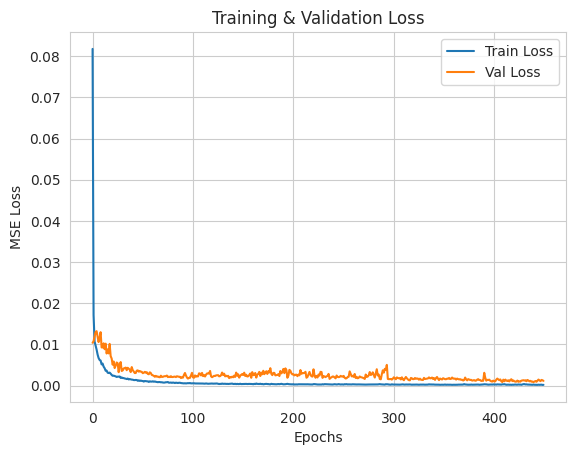

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from pandas import DataFrame, concat
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import mean_squared_error, r2_score, mean_absolute_error
import tensorflow as tf
from tensorflow.keras import layers, models

# --- 1. SETTINGS ---
n_past = 7      # Number of past days to use as input
n_future = 2    # Number of future days to predict

# --- 2. HELPER FUNCTION ---
def series_to_supervised(data, n_in=1, n_out=1, dropnan=True):
    n_vars = 1 if type(data) is list else data.shape[1]
    df = DataFrame(data)
    cols, names = [], []

    # Input sequence (t-n ... t-1)
    for i in range(n_in, 0, -1):
        cols.append(df.shift(i))
        names += [(f'var{j+1}(t-{i})') for j in range(n_vars)]

    # Forecast sequence (t, t+1 ... t+n)
    for i in range(0, n_out):
        cols.append(df.shift(-i))
        names += [(f'var{j+1}(t+{i})') for j in range(n_vars)]

    # Combine all
    agg = concat(cols, axis=1)
    agg.columns = names

    if dropnan:
        agg.dropna(inplace=True)
    return agg

# --- 3. LOAD AND PREPROCESS DATA ---
# Replace path below with your actual file location
file_path=r"/content/BHPreturn.csv"
dataset = pd.read_csv(file_path,header=0,index_col=0)
## df1=dataset.iloc[:,[1,2,3,4,5,6]]
values = dataset.values
values = values.astype('float32')
scaler = MinMaxScaler(feature_range=(0, 1))
scaled = scaler.fit_transform(values)

# Supervised learning format
reframed = series_to_supervised(scaled, n_past, n_future)
print(reframed.head())
print("Reframed shape:", reframed.shape)

# --- 4. SPLIT INTO TRAIN/TEST ---
values = reframed.values
train = values[:1079, :]
test = values[1080:, :]

# Split into inputs and output (only one step forecast)
train_X, train_y = train[:, :-1], train[:, -1]
test_X, test_y = test[:, :-1], test[:, -1]

# Reshape input for Keras: [samples, features]
print(train_X.shape, test_X.shape)

# --- 5. DEFINE KERAS MLP MODEL ---
def create_mlp_model(input_shape):


    model = models.Sequential([
        layers.Input(shape=(input_shape,)),
        layers.Dense(128, activation='relu'),
        layers.Dropout(0.2),  # Dropout after the first Dense layer
        layers.Dense(64, activation='relu'),
        layers.Dropout(0.2),  # Dropout after the second Dense layer
        layers.Dense(64, activation='relu'),
          # Dropout after the third Dense layer
        layers.Dense(1)  # Regression output
    ])

    return model

model = create_mlp_model(train_X.shape[1])
model.compile(optimizer='adam', loss='mse', metrics=['mae'])
model.summary()

# --- 6. TRAIN THE MODEL ---
history = model.fit(
    train_X,
    train_y,
    validation_data=(test_X, test_y),
    epochs=450,
    batch_size=64,
    verbose=2
)

# --- 7. EVALUATE MODEL ---
y_pred = model.predict(test_X)

rmse = np.sqrt(mean_squared_error(test_y, y_pred))
mse = mean_squared_error(test_y, y_pred)
r2 = r2_score(test_y, y_pred)
print(f"RMSE: {rmse:.4f}, MSE: {mse:.4f}, R²: {r2:.4f}")

# --- 8. OPTIONAL: PLOT LOSS ---
plt.plot(history.history['loss'], label='Train Loss')
plt.plot(history.history['val_loss'], label='Val Loss')
plt.legend()
plt.title("Training & Validation Loss")
plt.xlabel("Epochs")
plt.ylabel("MSE Loss")
plt.grid(True)
plt.show()


In [ ]:
pip install pandas matplotlib openpyxl


In [ ]:
!pip install statannotations # Install the required package 'statannotations'

    var1(t-7)  var2(t-7)  var3(t-7)  var4(t-7)  var5(t-7)  var6(t-7)  \
7    0.473464   0.399862   0.572502   0.505595   0.000000   0.270387   
8    0.480391   0.473464   0.399862   0.572502   0.136755   0.319360   
9    0.495793   0.480391   0.473464   0.399862   0.231230   0.370372   
10   0.591920   0.495793   0.480391   0.473464   0.112204   0.480676   
11   0.504141   0.591920   0.495793   0.480391   0.091429   0.333697   

    var7(t-7)  var8(t-7)  var9(t-7)  var10(t-7)  ...  var20(t+1)  var21(t+1)  \
7    0.251201   0.260576   0.349954    0.000000  ...    0.030320    0.292107   
8    0.301592   0.224096   0.307113    0.000000  ...    0.029384    0.336335   
9    0.339905   0.276756   0.277163    0.136755  ...    0.029384    0.353590   
10   0.429497   0.365488   0.375592    0.231230  ...    0.028448    0.261199   
11   0.430604   0.380006   0.392274    0.112204  ...    0.025753    0.287804   

    var22(t+1)  var23(t+1)  var24(t+1)  var25(t+1)  var26(t+1)  var27(t+1)  \
7     0.

/usr/local/lib/python3.11/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Epoch 1/450
58/58 - 4s - 66ms/step - accuracy: 0.5052 - loss: 0.6999 - val_accuracy: 0.5657 - val_loss: 0.6846
Epoch 2/450
58/58 - 0s - 5ms/step - accuracy: 0.5357 - loss: 0.6917 - val_accuracy: 0.5721 - val_loss: 0.6784
Epoch 3/450
58/58 - 0s - 7ms/step - accuracy: 0.5632 - loss: 0.6829 - val_accuracy: 0.6025 - val_loss: 0.6721
Epoch 4/450
58/58 - 0s - 5ms/step - accuracy: 0.5866 - loss: 0.6740 - val_accuracy: 0.6273 - val_loss: 0.6623
Epoch 5/450
58/58 - 0s - 5ms/step - accuracy: 0.6032 - loss: 0.6642 - val_accuracy: 0.6857 - val_loss: 0.6507
Epoch 6/450
58/58 - 0s - 5ms/step - accuracy: 0.6280 - loss: 0.6560 - val_accuracy: 0.7219 - val_loss: 0.6304
Epoch 7/450
58/58 - 0s - 5ms/step - accuracy: 0.6435 - loss: 0.6429 - val_accuracy: 0.7086 - val_loss: 0.6100
Epoch 8/450
58/58 - 0s - 5ms/step - accuracy: 0.6590 - loss: 0.6241 - val_accuracy: 0.7575 - val_loss: 0.5854
Epoch 9/450
58/58 - 0s - 5ms/step - accuracy: 0.6885 - loss: 0.6041 - val_accuracy: 0.7289 - val_loss: 0.5700
Epoch 10/

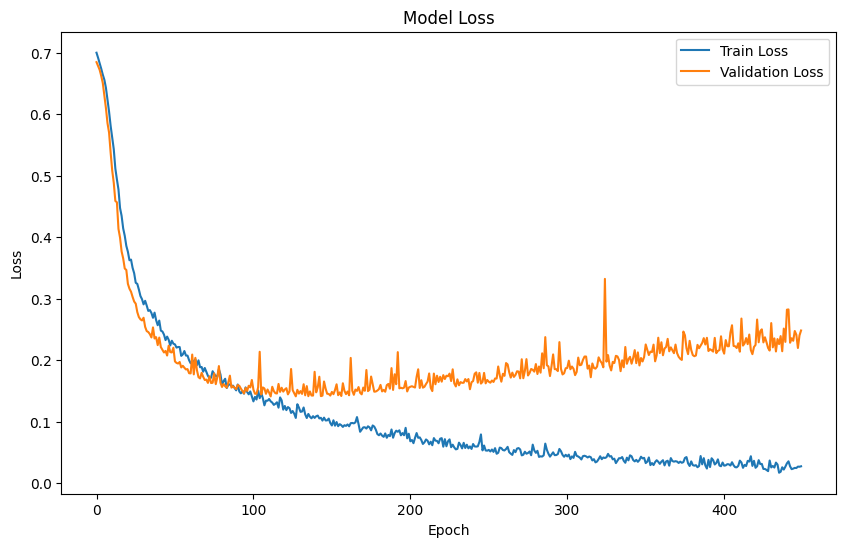

50/50 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step
Confusion Matrix:
[[729  34]
 [ 77 735]]
Classification Report:
              precision    recall  f1-score   support

           0       0.90      0.96      0.93       763
           1       0.96      0.91      0.93       812

    accuracy                           0.93      1575
   macro avg       0.93      0.93      0.93      1575
weighted avg       0.93      0.93      0.93      1575

Final Training Accuracy: 0.9905
Final Validation (Testing) Accuracy: 0.9295


In [1]:

import math
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from pandas import read_csv, DataFrame, concat
from sklearn.preprocessing import LabelEncoder, MinMaxScaler
from sklearn.metrics import r2_score, mean_squared_error, mean_absolute_error

import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.losses import BinaryCrossentropy

# Set future steps
n_future = 20

# Convert series to supervised learning
def series_to_supervised(data, n_in=5, n_out=1, dropnan=True):
	n_vars = 1 if type(data) is list else data.shape[1]
	df = DataFrame(data)
	cols, names = list(), list()
	# input sequence (t-n, ... t-1)
	for i in range(n_in, 0, -1):
		cols.append(df.shift(i))
		names += [('var%d(t-%d)' % (j+1, i)) for j in range(n_vars)]
	# forecast sequence (t, t+1, ... t+n)
	for i in range(0, n_out):
		cols.append(df.shift(-i))
		if i == 0:
			names += [('var%d(t)' % (j+1)) for j in range(n_vars)]
		else:
			names += [('var%d(t+%d)' % (j+1, i)) for j in range(n_vars)]
	# put it all together
	agg = concat(cols, axis=1)
	agg.columns = names
	# drop rows with NaN values
	if dropnan:
		agg.dropna(inplace=True)
	return agg

# Load and preprocess data
file_path=r"/content/BHPTrend.csv"
dataset = pd.read_csv(file_path,header=0,index_col=0)
## df1=dataset.iloc[:,[1,2,3,4,5,6]]
values = dataset.values
values = values.astype('float32')
scaler = MinMaxScaler(feature_range=(0, 1))
scaled = scaler.fit_transform(values)

# Reframe data
reframed = series_to_supervised(scaled, 7, 2)
print(reframed.head())
print(reframed.shape)

# Assume last column is target
values = reframed.values
n_train_hours = int(len(values) * 0.7)
train = values[:n_train_hours, :]
test = values[n_train_hours:, :]

train_X, train_y = train[:, :-1], train[:, -1]
test_X, test_y = test[:, :-1], test[:, -1]

# Reshape input to be 3D [samples, timesteps, features] for consistency with original PyTorch model
train_X = train_X.reshape((train_X.shape[0], 1, train_X.shape[1]))
test_X = test_X.reshape((test_X.shape[0], 1, test_X.shape[1]))

# Flatten input for Dense layers
train_X_flat = train_X.reshape((train_X.shape[0], -1))
test_X_flat = test_X.reshape((test_X.shape[0], -1))

# Define model
def build_mlp_classifier(input_size, output_size, num_classes=2, dropout_rate=0.2):
    model = Sequential()
    model.add(Dense(128, input_dim=input_size, activation='relu'))
    model.add(Dropout(0.2))
    model.add(Dense(64, activation='relu'))
    model.add(Dropout(0.2))
    model.add(Dense(32, activation='relu'))
    if num_classes == 2:
        model.add(Dense(1, activation='sigmoid'))
    else:
        model.add(Dense(num_classes, activation='softmax'))
    return model

# Parameters
num_classes = 2
output_size = 1 if num_classes == 2 else num_classes
dropout_rate = 0.2

# Create model
model = build_mlp_classifier(input_size=train_X_flat.shape[1],
                             output_size=output_size,
                             num_classes=2,
                             dropout_rate=dropout_rate)

# Compile model
model.compile(optimizer=Adam(learning_rate=0.0001),
              loss=BinaryCrossentropy(),
              metrics=['accuracy'])

# Train model
history = model.fit(train_X_flat, train_y,
                    validation_data=(test_X_flat, test_y),
                    epochs=450,
                    batch_size=64,
                    verbose=2)

# Plot loss
plt.figure(figsize=(10, 6))
plt.plot(history.history['loss'], label='Train Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.title("Model Loss")
plt.ylabel("Loss")
plt.xlabel("Epoch")
plt.legend()
plt.show()

from sklearn.metrics import confusion_matrix, classification_report


# Make predictions
y_pred_probs = model.predict(test_X_flat)
y_pred_classes = (y_pred_probs > 0.5).astype("int32")

# Convert test labels to binary
test_y_binary = (test_y > 0.5).astype("int32")

# Confusion matrix and classification report
cm = confusion_matrix(test_y_binary, y_pred_classes)
print("Confusion Matrix:")
print(cm)

cr = classification_report(test_y_binary, y_pred_classes)
print("Classification Report:")
print(cr)

# Final Training and Testing Accuracy
final_train_acc = history.history['accuracy'][-1]
final_val_acc = history.history['val_accuracy'][-1]

print(f"Final Training Accuracy: {final_train_acc:.4f}")
print(f"Final Validation (Testing) Accuracy: {final_val_acc:.4f}")
